In [2]:
!pip install pandas

     |████████████████████████████████| 9.5 MB 9.9 MB/s eta 0:00:01     |█████████████████████████████▋  | 8.8 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 6.8 MB/s eta 0:00:01


In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as tfk

## Data input

In [6]:
# masked funktion benyttet af Kuo i Deep Triangle
def masked_mse(mask_value): 
   # y_true, y_pred kommer fra tensorflow kørsel
   def masked_calc(y_true, y_pred):
       keep_value        = tfk.cast(tfk.not_equal(y_true,mask_value),tfk.floatx()) 
       sum_squared_error = tfk.sum(tfk.square(keep_value * (y_true - y_pred)), axis = 2)
       return (sum_squared_error / tfk.sum(keep_value, axis = 2))
   return masked_calc


In [125]:
def custom_mse(y_true, y_pred):
# assume 1st dimension is the number of samples
    mask = y_true != mask_value
    mse = tfk.mean(tfk.square((y_pred-y_true)*mask))

    return mse

In [ ]:
masked_mse <- function(mask_value) {
  function(y_true, y_pred) {
    keep_value <- k_cast(k_not_equal(y_true, mask_value), k_floatx())
    sum_squared_error <- k_sum(
      k_square(keep_value * (y_true - y_pred)),
      axis = 2
    )
    sum_squared_error / k_sum(keep_value, axis = 2)
  }
}

In [2]:
x = pd.read_csv("x.csv", sep=";", decimal=",")
x.drop("Unnamed: 0", axis=1, inplace=True)

y = pd.read_csv("y.csv", sep=";", decimal=",")
y.drop("Unnamed: 0", axis=1, inplace=True)

validation = pd.read_csv("validation.csv", sep=";", decimal=",")
validation.drop("Unnamed: 0", axis=1, inplace=True)

In [143]:
x.head(20)

NameError: name 'x_df' is not defined

In [142]:
pd.DataFrame(x_single.reshape(45,9))

,0,1,2,3,4,5,6,7,8
0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.073245
1,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.073245,0.050865
2,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.073245,0.050865,0.020346
3,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.073245,0.050865,0.020346,0.014242
4,-99.000000,-99.000000,-99.000000,-99.000000,0.073245,0.050865,0.020346,0.014242,0.011190
5,-99.000000,-99.000000,-99.000000,0.073245,0.050865,0.020346,0.014242,0.011190,0.008138
6,-99.000000,-99.000000,0.073245,0.050865,0.020346,0.014242,0.011190,0.008138,0.005086
7,-99.000000,0.073245,0.050865,0.020346,0.014242,0.011190,0.008138,0.005086,0.001017
8,0.073245,0.050865,0.020346,0.014242,0.011190,0.008138,0.005086,0.001017,0.003052
9,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.118467


In [95]:
x_single = x[x["group_code"] ==0]
x_single = x_single[x_single.columns[:9]].to_numpy()
x_single = x_single[:,:,np.newaxis]

val_single = validation[validation["x.group_code"] ==0]
validation_single_x = val_single[val_single.columns[:9]].to_numpy()
validation_single_x = validation_single_x[:,:,np.newaxis]
validation_single_y = val_single[val_single.columns[val_single.columns.str.startswith("y.paid_")]].to_numpy()
validation_single_y = validation_single_y[:,:,np.newaxis]

y_single = y[x["group_code"] ==0]
y_single = y_single[y_single.columns[:9]].to_numpy()
y_single = y_single[:,:, np.newaxis]

In [96]:
print(f"x shape: {x_single.shape}, y shape : {y_single.shape},  validation x shape : {validation_single_x.shape},  validation y shape : {validation_single_y.shape}")

x shape: (45, 9, 1), y shape : (45, 9, 1),  validation x shape : (17, 9, 1),  validation y shape : (17, 9, 1)


## Modell definisjon

In [59]:
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, RepeatVector, LSTM
from tensorflow.keras.models import Sequential

In [60]:
model = Sequential()

# encoder layer
model.add(layers.Masking(mask_value = -99, input_shape = (9,1)))
model.add(layers.LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))

# repeat vector
model.add(RepeatVector(9))

# decoder layer
model.add(layers.LSTM(64, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2))

model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 9, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 9, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 64)             33024     
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 1)              65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
model.fit(x= x_single,
             y= y_single,
             batch_size = 2250,
             epochs = 100,
             verbose = 1)

Train on 45 samples
Epoch 1/100
45/45 [==============================] - 3s 58ms/sample - loss: 5808.0889
Epoch 2/100
45/45 [==============================] - 0s 657us/sample - loss: 5806.2739
Epoch 3/100
45/45 [==============================] - 0s 712us/sample - loss: 5804.3037
Epoch 4/100
45/45 [==============================] - 0s 756us/sample - loss: 5802.4888
Epoch 5/100
45/45 [==============================] - 0s 727us/sample - loss: 5800.3706
Epoch 6/100
45/45 [==============================] - 0s 675us/sample - loss: 5797.8672
Epoch 7/100
45/45 [==============================] - 0s 651us/sample - loss: 5795.5557
Epoch 8/100
45/45 [==============================] - 0s 703us/sample - loss: 5792.2788
Epoch 9/100
45/45 [==============================] - 0s 674us/sample - loss: 5788.8730
Epoch 10/100
45/45 [==============================] - 0s 742us/sample - loss: 5786.0840
Epoch 11/100
45/45 [==============================] - 0s 636us/sample - loss: 5780.4771
Epoch 12/100
45/45 [==

Epoch 94/100
45/45 [==============================] - 0s 645us/sample - loss: 4126.8599
Epoch 95/100
45/45 [==============================] - 0s 582us/sample - loss: 4122.1226
Epoch 96/100
45/45 [==============================] - 0s 843us/sample - loss: 4114.0605
Epoch 97/100
45/45 [==============================] - 0s 631us/sample - loss: 4105.9697
Epoch 98/100
45/45 [==============================] - 0s 599us/sample - loss: 4103.7148
Epoch 99/100
45/45 [==============================] - 0s 616us/sample - loss: 4094.1516
Epoch 100/100
45/45 [==============================] - 0s 589us/sample - loss: 4086.4529


In [134]:

ay_seq_input  = layers.Input(shape = (9,1))

encoded = layers.Masking(mask_value = -99)(ay_seq_input)
encoded = layers.GRU(64, dropout = 0.2, recurrent_dropout = 0.2)(encoded)

decoded = layers.RepeatVector(9)(encoded)
decoded = layers.GRU(64, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2)(decoded)


paid_output = layers.TimeDistributed(layers.Dense(units = 32, activation = "relu"))(decoded)
paid_output1 = layers.TimeDistributed(layers.Dropout(rate = 0.2))(paid_output)
paid_output2 = layers.TimeDistributed(layers.Dense(units = 1, activation = "relu"), name = "paid_output")(paid_output1)

model = keras.Model(
inputs = ay_seq_input,
outputs = paid_output2, name="DeepTriangle"
)
model.compile(optimizer = Adam(learning_rate=0.001, amsgrad = True),
            loss         = [masked_mse(missing_value)],
            loss_weights = [0.5])


In [68]:
model.summary()

Model: "DeepTriangle"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
masking (Masking)            (None, 9, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 9, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 64)             33024     
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 32)             2080      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 32)            

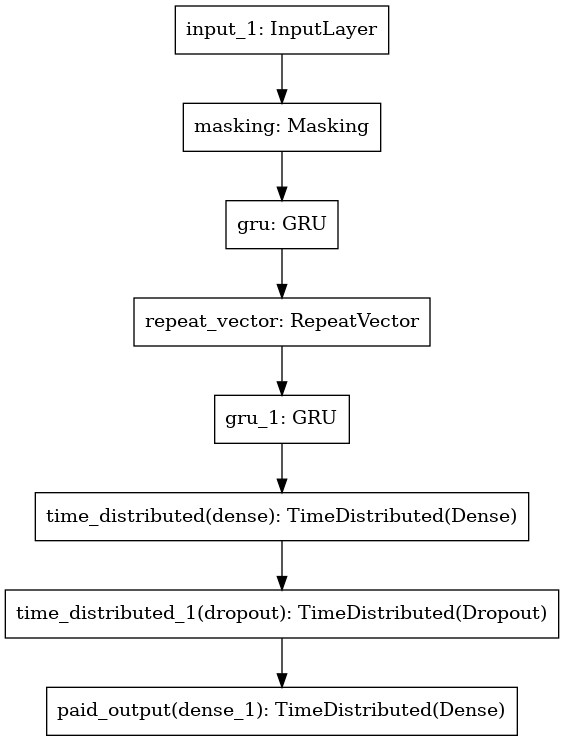

In [14]:
keras.utils.plot_model(model, "my_first_model.png")

## Modell - fit og predict

In [121]:
from tensorflow.keras.layers import Flatten

In [136]:
def masked_mse(missing_value):
    
    def custom_mse(y_true, y_pred):
    # assume 1st dimension is the number of samples
        mask = y_true != missing_value
        mse = tfk.mean(tfk.square((y_pred-y_true)*mask, axis=2), axis=2)

        return mse

    return custom_mse


In [133]:
tfk.clear_session()

In [138]:
### beregner model
#tfk.clear_session()

#beregn_model.fit(x= X_train,y= y_train, batch_size = X_dim1, epochs = 99, callbacks = (callback), verbose = 0) KRÆVER valideringsdata

model.fit(x= x_single,
             y= y_single,
             batch_size = 2250,
             epochs = 100,
            validation_data=(validation_single_x, validation_single_y),
             callbacks =[callback],
             verbose = 1)

#Y_ibnr = model.predict(X_ibnr)

Train on 45 samples, validate on 17 samples
Epoch 1/100
45/45 [==============================] - 0s 660us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 2/100
45/45 [==============================] - 0s 723us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 3/100
45/45 [==============================] - 0s 616us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 4/100
45/45 [==============================] - 0s 583us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 5/100
45/45 [==============================] - 0s 554us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 6/100
45/45 [==============================] - 0s 591us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 7/100
45/45 [==============================] - 0s 556us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 8/100
45/45 [==============================] - 0s 633us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 9/100
45/45 [==============================] - 0s 574us/sample - loss: 2904.00

45/45 [==============================] - 0s 631us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 76/100
45/45 [==============================] - 0s 611us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 77/100
45/45 [==============================] - 0s 600us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 78/100
45/45 [==============================] - 0s 605us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 79/100
45/45 [==============================] - 0s 625us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 80/100
45/45 [==============================] - 0s 648us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 81/100
45/45 [==============================] - 0s 638us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 82/100
45/45 [==============================] - 0s 624us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 83/100
45/45 [==============================] - 0s 625us/sample - loss: 2904.0007 - val_loss: 4099.7646
Epoch 84/100
45/45 [===